# Importanto as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import plotly.express as px
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy import interpolate



# Arquivos antes do tratamento

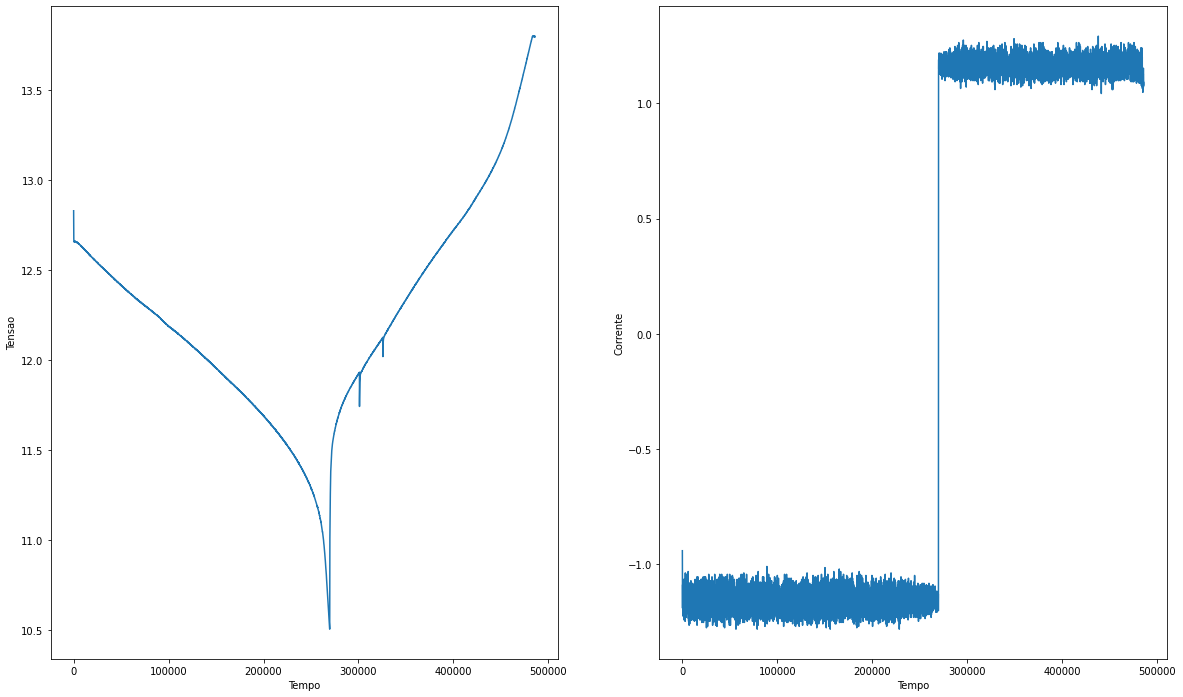

In [2]:
parametros_soc = pd.read_csv(r"C:\Users\gabri\OneDrive\Documents\Python Scripts\Baterias\Narada PbC 70 Ah l OCV vs SoC.csv",decimal='.', skiprows=[1])
parametros_soc = parametros_soc.dropna()
tempo_seg = []

for i in (parametros_soc['Prog Time']):
    
    hr = int(i.split(':')[0])
    min = int(i.split(':')[1])
    sec = int(i.split(':')[2])
    tempo_seg.append(datetime.timedelta(hours = hr, minutes = min, seconds = sec).total_seconds())

parametros_soc.drop('Prog Time', axis=1, inplace=True)
parametros_soc.insert(0, 'seconds', tempo_seg)

fig, ax = plt.subplots(figsize=(20,12))
plt.subplot(121)
plt.plot(parametros_soc['seconds'], parametros_soc['Voltage'] )
plt.xlabel('Tempo')
plt.ylabel('Tensao')

plt.subplot(122)
plt.plot(parametros_soc['seconds'], parametros_soc['Current'] )
plt.xlabel('Tempo')
plt.ylabel('Corrente')

plt.show()



# Soc e OCV

In [3]:
df_soc_des = pd.read_csv('Narada descarga OCV vs SoC.csv',decimal='.', skiprows=[1])
df_soc_des

,seconds,Voltage,Current,hour,CargaAH,SoC,Tempo
0,63,12.727,-1.164471,0.016667,-0.019408,0.999778,2
1,123,12.692,-1.164471,0.033333,-0.038816,0.999555,3
2,183,12.674,-1.164471,0.050000,-0.058224,0.999333,4
3,243,12.666,-1.164471,0.066667,-0.077631,0.999110,5
4,303,12.661,-1.164471,0.083333,-0.097039,0.998888,6
...,...,...,...,...,...,...,...
4491,269523,10.521,-1.164471,74.866667,-87.180055,0.000745,4493
4492,269583,10.516,-1.164471,74.883333,-87.199463,0.000523,4494
4493,269643,10.509,-1.164471,74.900000,-87.218871,0.000300,4495
4494,269703,10.506,-1.164471,74.916667,-87.238279,0.000078,4496


In [4]:
fig = px.line(df_soc_des, x="SoC", y="Voltage", title='OCV vs SOC')
fig.show()

# Base de Parametros

## Antes do tratamento

In [5]:
# Importa
parametros_r = pd.read_excel(r"C:\Users\gabri\OneDrive\Documents\Python Scripts\Baterias\Battery\Narada 70 Ah Pb-C parametros.xlsx",decimal='.', skiprows=[1])

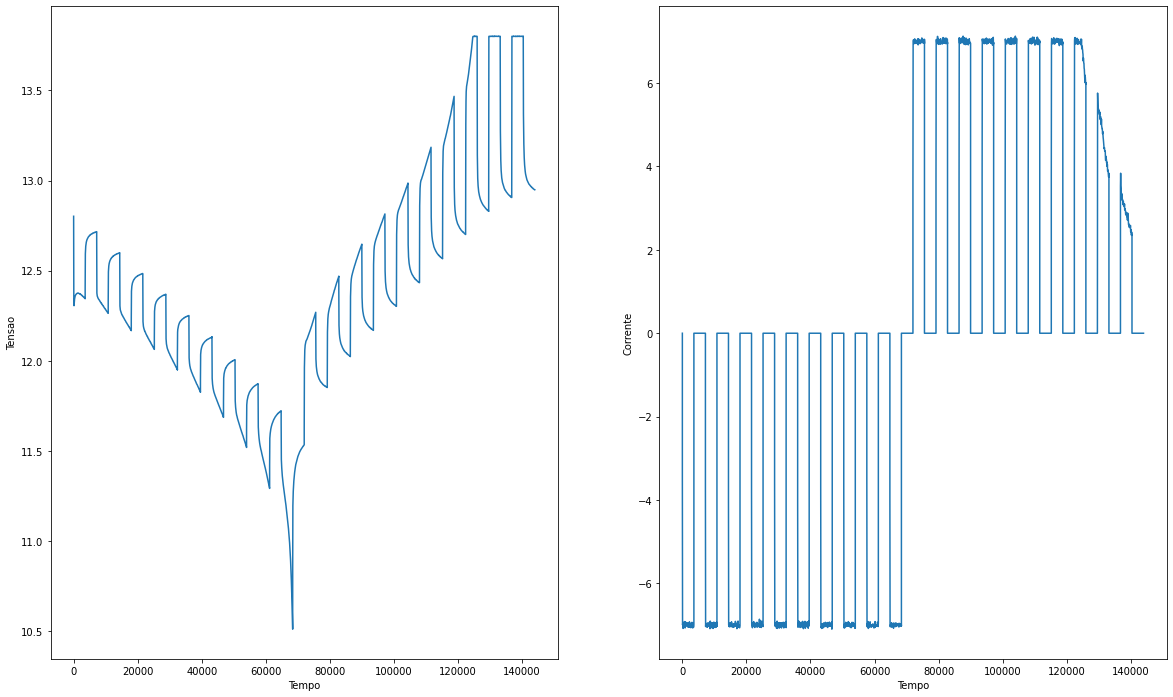

In [6]:
# Tratamento 
parametros_r['Time Stamp'] = parametros_r['Time Stamp'].astype(str)
tempo_seg = []
for i in (parametros_r['Time Stamp']):
    date, time = i.split(" ")
    year,month,day = date.split("-")
    hr = int(time.split(':')[0])
    min = int(time.split(':')[1])
    sec = int(time.split(':')[2])
    tempo_seg.append(datetime.timedelta(days=int(day) ,hours = hr, minutes = min, seconds = sec).total_seconds())
    
parametros_r.drop('Time Stamp', axis=1, inplace=True)
parametros_r.insert(0, 'seconds', tempo_seg)
parametros_r = parametros_r.drop(labels=0, axis=0)
parametros_r['seconds'] = parametros_r['seconds'] - parametros_r.iloc[0,0]

# Plot
fig, ax = plt.subplots(figsize=(20,12))
plt.subplot(121)
plt.plot(parametros_r['seconds'], parametros_r['Voltage'] )
plt.xlabel('Tempo')
plt.ylabel('Tensao')

plt.subplot(122)
plt.plot(parametros_r['seconds'], parametros_r['Current'] )
plt.xlabel('Tempo')
plt.ylabel('Corrente')


plt.show()

## Selecionando apenas a descarga

In [7]:
df_par_des = pd.read_csv("Narada parametros descarga.csv",decimal='.', skiprows=[1])
df_par_des['amostra'] = np.arange(len(df_par_des))

In [8]:
fig = px.line(df_par_des, x="seconds", y="Voltage", title='Tensão(t) vs Second')
fig.show()

In [9]:
# Retorna os indices das nossa curvas de descarga
# seconds = [[y0, yf0], [y1, yf1]]

seconds = [ [3660	,7200],
            [10860,	14400],
            [18060,	21600],
            [25261,	28801],
            [32461,	36001],
            [39661,	43201],
            [46861,	50401],
            [54601,	57601],
            [61261,	64801]]
y_axis = []
for second in seconds:
    try:
        y0 = df_par_des[df_par_des['seconds']==second[0]].index[0]
        yf = df_par_des[df_par_des['seconds']==second[1]].index[0]
    except:
        print(second)

    par = [y0, yf]
    y_axis.append(par)

In [10]:
def equa_vo(t, v0, v1, v2, tau1, tau2):
    return v0 + v1 * np.exp(-t*tau1) + v2 * np.exp(-t*tau2) 

In [11]:
def equa(t, v1, v2, tau1, tau2):
    return v1 * np.exp(-t*tau1) + v2 * np.exp(-t*tau2) 

In [12]:
# Definindo Parametros para otimizar a função de fit da curva
maxfev=300000
p0_vo = [0.00001,0.00001, 1000000, 0.001, 0.00001]
p0_vo = [0.00002,0.00002, 2000000, 0.002, 0.00002]

p0 = [0.00001, 1000000, 0.001, 0.00001]
# p0 = [0.00002, 2000000, 0.002, 0.00002]


## Plottando função com R0

C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\4006290720.py:2: RuntimeWarning:

overflow encountered in exp



Decaimento 1 :
v0: 3.9161286284750156
v1: 4.370766148621299 v2: 4.370909300134583
tau1: 0.00013696850031248283 tau2: 0.00013684583947094916


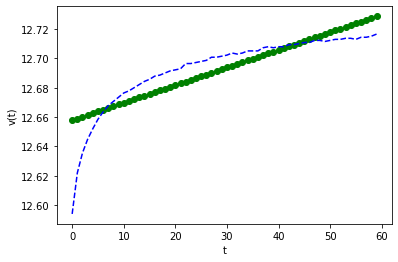

Decaimento 2 :
v0: 4.1653356605130565
v1: 4.189472838143033 v2: 4.189577139398202
tau1: 0.0001328617851672321 tau2: 0.00013272864367901317


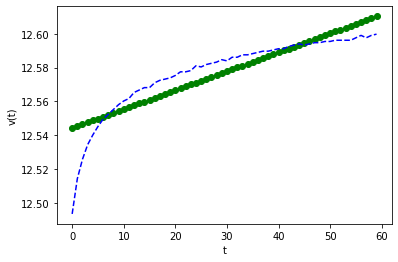

Decaimento 3 :
v0: 3.857641467300267
v1: 4.286443290134979 v2: 4.286313977440856
tau1: 0.00012670277577758775 tau2: 0.00012661175684563485


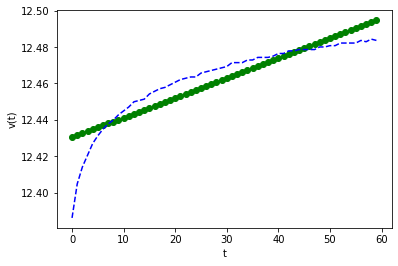

Decaimento 4 :
v0: 2.2491602703587246
v1: 5.03334494890495 v2: 5.032427871674364
tau1: 0.00010673863759231713 tau2: 0.00010667296536368489


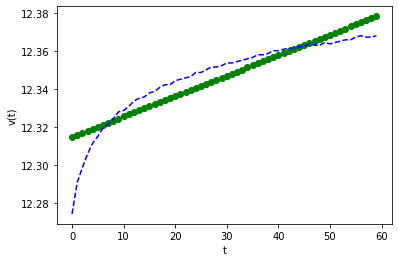

Decaimento 5 :
v0: 2.1723818917463626
v1: 5.01242784474468 v2: 5.011797157113305
tau1: 0.00010890062191082028 tau2: 0.00010888449153196052


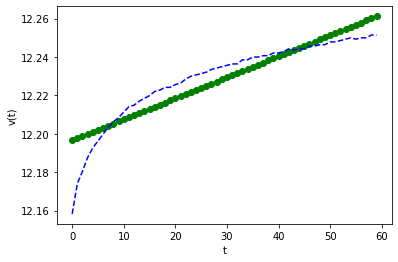

Decaimento 6 :
v0: 2.9996433167917993
v1: 4.536945705254446 v2: 4.536971927137914
tau1: 0.00012595989059614813 tau2: 0.0001259932546543107


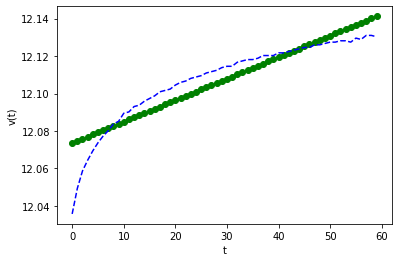

Decaimento 7 :
v0: 1.4651725625816303
v1: 5.232337499061797 v2: 5.24497926974055
tau1: 0.00012049499910296902 tau2: 0.00012043809266338082


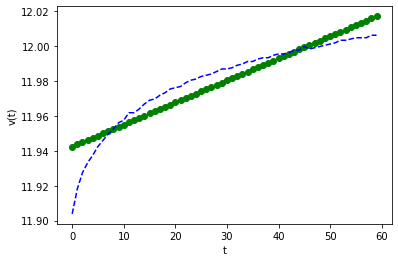

Decaimento 8 :
v0: 3.318897152312474
v1: 4.251884486182344 v2: 4.251788747895027
tau1: 0.00013180380170649137 tau2: 0.00013173283917152284


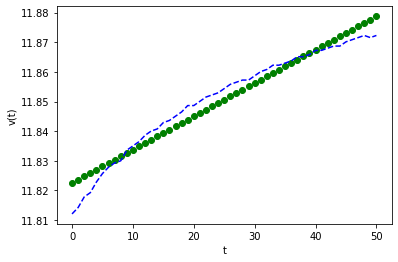

Decaimento 9 :
v0: 0.0021818564477781403
v1: 5.773896802980624 v2: 5.844399140730911
tau1: 0.0001732737305428633 tau2: 0.0001733899094063943


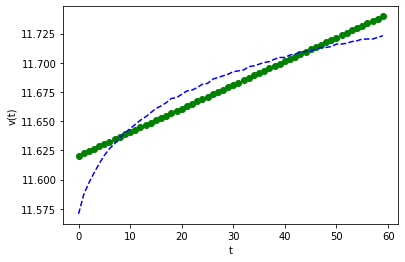

In [13]:
N = len(y_axis)
lista = []

for i in range(N):
  y0 = y_axis[i][0]
  y = y_axis[i][1]-1
  v = df_par_des['Voltage'].iloc[y0:y+2].to_numpy()
  t = df_par_des['amostra'].iloc[y0:y+2].to_numpy() - y0
  t.astype(int)

  # popt, pcov = curve_fit(equa_vo, t, v, maxfev=maxfev, p0 = p0_vo)
  popt, pcov = curve_fit(equa_vo, t, v, maxfev=maxfev)
  
  
  print('Decaimento', i+1, ':')  
  print('v0:', np.abs(popt[0]))
  print('v1:', np.abs(popt[1]), 'v2:', np.abs(popt[2]))
  print('tau1:', np.abs(popt[3]), 'tau2:', np.abs(popt[4]))
  
  # SoC = df['SoC'].iloc[y0:y+2].to_numpy()
  plt.plot(t, equa_vo(t, *popt), 'go')
  plt.plot(t, v, 'b--')
  plt.xlabel('t')
  plt.ylabel('v(t)')
  plt.show()
  for i in range(len(popt)):
    popt[i] = np.abs(popt[i])
  lista.append(popt)

## Plottando função sem R0

Decaimento 1 :
v1: 98.52029616018855 v2: 85.8625815547788
tau1: 4.3128420950098436e-08 tau2: 1.4066011884362557e-05


C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\2952681477.py:2: RuntimeWarning:

overflow encountered in exp



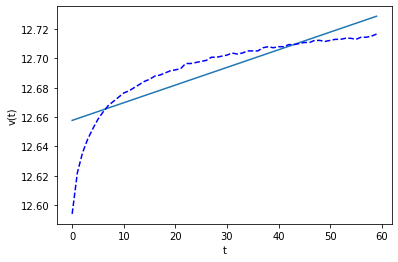

Decaimento 2 :
v1: 1751.494351685553 v2: 1738.9687998138581
tau1: 0.002164031909229775 tau2: 0.0021814071210638835


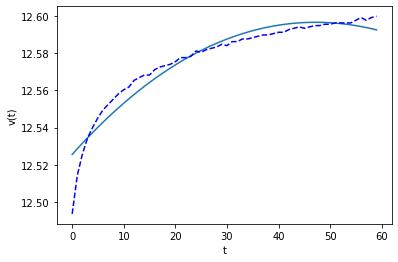

Decaimento 3 :
v1: 1929.2995911044802 v2: 1916.8864034720502
tau1: 0.0020780586786266365 tau2: 0.002093032885805058


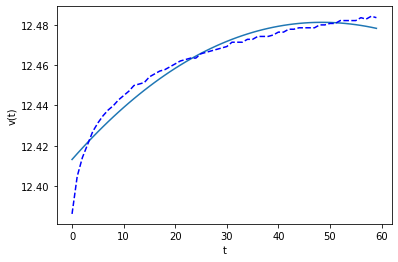

Decaimento 4 :
v1: 1490.0566662034475 v2: 1477.7580453952323
tau1: 0.0020299066368357427 tau2: 0.002048695902062238


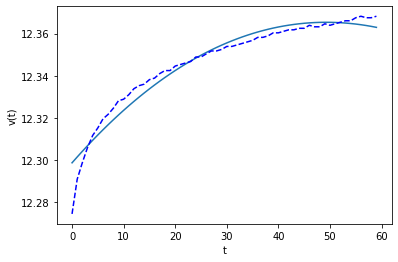

Decaimento 5 :
v1: 1850.1544233758968 v2: 1837.9737721906265
tau1: 0.0020164717016245086 tau2: 0.002031348004454768


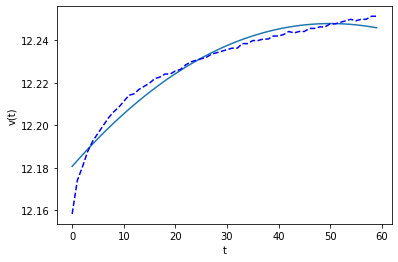

Decaimento 6 :
v1: 1874.4924145183688 v2: 1862.4352593806161
tau1: 0.002050726305311586 tau2: 0.002065548735226997


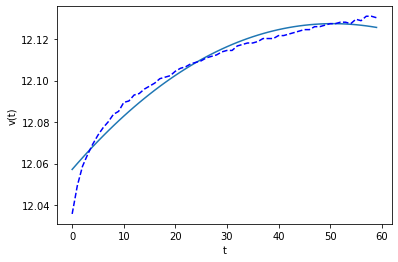

Decaimento 7 :
v1: 105.75189782298777 v2: 93.80948444158398
tau1: 1.0642648267764401e-08 tau2: 1.353021661357248e-05


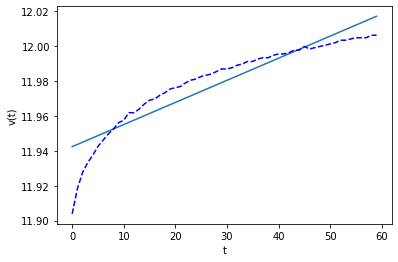

Decaimento 8 :
v1: 94.0420271411256 v2: 82.21950040592125
tau1: 3.0164132448886727e-07 tau2: 1.3337823659686868e-05


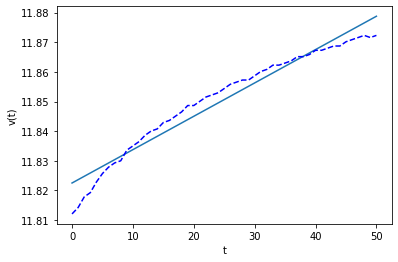

Decaimento 9 :
v1: 2116.2166499117184 v2: 2104.6219274660148
tau1: 0.002557702612472908 tau2: 0.0025740526012617867


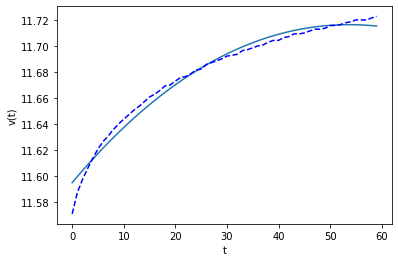

In [14]:
N = len(y_axis)
lista = []

for i in range(N):
  y0 = y_axis[i][0]
  y = y_axis[i][1]-1
  v = df_par_des['Voltage'].iloc[y0:y+2].to_numpy()
  t = df_par_des['amostra'].iloc[y0:y+2].to_numpy() - y0
  t.astype(int)

  popt, pcov = curve_fit(equa, t, v, maxfev=maxfev, p0 = p0)
  # popt, pcov = curve_fit(equa, t, v, maxfev=maxfev)
  
  
  print('Decaimento', i+1, ':')
  print('v1:', np.abs(popt[0]), 'v2:', np.abs(popt[1]))
  print('tau1:', np.abs(popt[2]), 'tau2:', np.abs(popt[3]))
  
  plt.plot(t, equa(t, *popt), '')
  plt.plot(t, v, 'b--')
  plt.xlabel('t')
  plt.ylabel('v(t)')
  plt.show()
  for i in range(len(popt)):
    popt[i] = np.abs(popt[i])
  lista.append(popt)

In [15]:
I = 1.16
def getR1(v1, I): 
  return np.abs(v1/I)

def getR2(v2, I):
  return np.abs(v2/I)

def getC1(R1, tau1):
  return np.abs(tau1/R1)

def getC2(R2, tau2):
  return np.abs(tau2/R2)

N = len(lista)
C1 = []
C2 = []
R1 = []
R2 = []

for i in range(N):
  R1.append(getR1(lista[i][0], I))
  R2.append(getR2(lista[i][1], I))
  C1.append(getC1(R1[-1], lista[i][2]))
  C2.append(getC2(R2[-1], lista[i][3]))

# Mudança de Bateria

* Como nosso modelo de bateria apresentou problemas durante a aquisição, para continuar nossos testes de outro modelo de  Bateria e realizamos a rodagem do nosso código a partir deste ponto, com a bateria concedida pelo outro grupo
* LG NMC L0267 64 Ah
* Corrente média de 2.6A 

        Vamos encontrar os pontos no gráfico para nossa análise. Para isso, vamos realizar diversos subplots e interpolar os valores:

In [16]:
df = pd.read_csv(r"C:\Users\gabri\OneDrive\Documents\Python Scripts\Baterias\Baterias_Edited\LG NMC L0267.csv")
df['Tempo'] = np.arange(len(df))

Decaimento 1 :
v1: 0.003624348854866673 v2: 4.047070548890678
tau1: 0.09809992341237096 tau2: 8.82706472765191e-06


C:\Users\gabri\AppData\Local\Temp\ipykernel_3600\2952681477.py:2: RuntimeWarning:

overflow encountered in exp



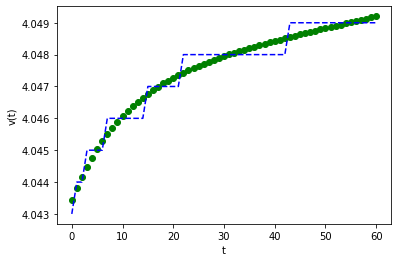

Decaimento 2 :
v1: 718.0892492862336 v2: 714.1512851885857
tau1: 0.0009609588202972832 tau2: 0.0009665363697456553


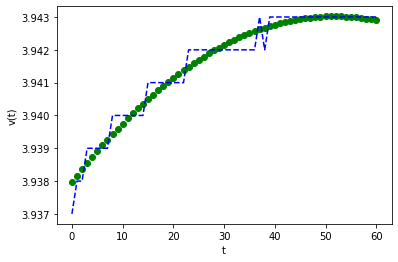

Decaimento 3 :
v1: 882.462566760077 v2: 878.6221799452456
tau1: 0.0011655108192331462 tau2: 0.0011709148894954425


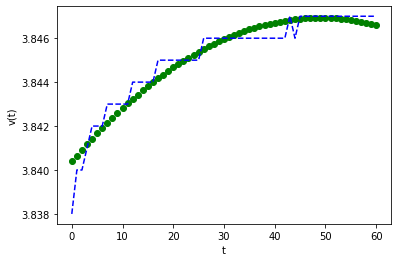

Decaimento 4 :
v1: 1008.9896115128921 v2: 1005.2566077671582
tau1: 0.0015661726076112935 tau2: 0.0015725145011403407


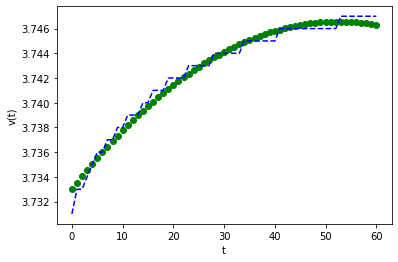

Decaimento 5 :
v1: 752.0245679959253 v2: 748.358685363769
tau1: 0.0009894243218974692 tau2: 0.0009944841299831838


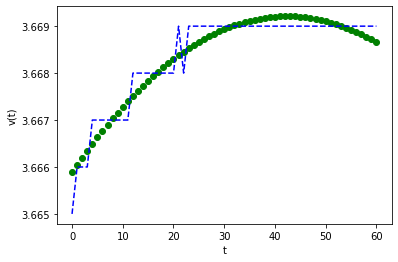

Decaimento 6 :
v1: 710.2592815038273 v2: 706.6320036824424
tau1: 0.0010446844866094196 tau2: 0.0010503530542497286


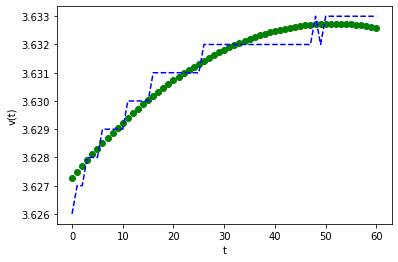

Decaimento 7 :
v1: 875.8632479962639 v2: 872.2693532904001
tau1: 0.0011428915166342784 tau2: 0.0011478848083702447


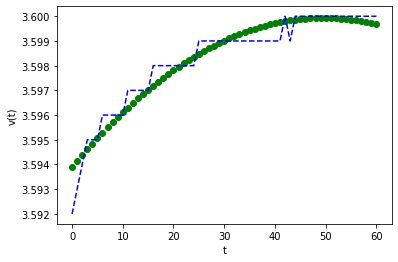

Decaimento 8 :
v1: 636.7700325947376 v2: 633.2398268150665
tau1: 0.0008993975453432727 tau2: 0.0009046823218729105


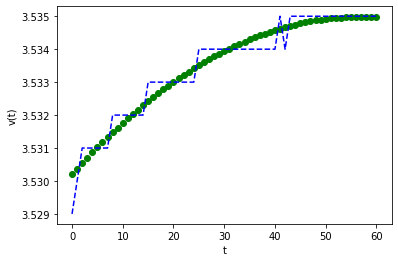

Decaimento 9 :
v1: 832.13505249907 v2: 828.6740670275536
tau1: 0.0010559555758343532 tau2: 0.0010606358538722696


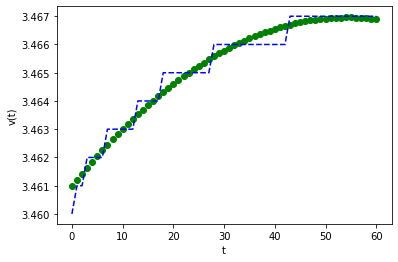

In [17]:
y_axis = [[62, 122], [184, 244], [306, 366], [428, 488], [550, 610], [672, 732], [794, 854], [916, 976], [1038, 1098]]
N = len(y_axis)
lista = []
for i in range(N):
  
  y0 = y_axis[i][0]
  y = y_axis[i][1]-1
  v = df['Tensão'].iloc[y0:y+2].to_numpy()
  t = df['Tempo'].iloc[y0:y+2].to_numpy() - y0
  popt, pcov = curve_fit(equa, t, v, maxfev=300000, p0 = [0.00001, 1000000, 0.001, 0.0001])
  print('Decaimento', i+1, ':')
  print('v1:', np.abs(popt[0]), 'v2:', np.abs(popt[1]))
  print('tau1:', np.abs(popt[2]), 'tau2:', np.abs(popt[3]))
  
  plt.plot(t, equa(t, *popt), 'go')
  plt.plot(t, v, 'b--')
  plt.xlabel('t')
  plt.ylabel('v(t)')
  plt.show()
  for i in range(len(popt)):
    popt[i] = np.abs(popt[i])
  lista.append(popt)

        Vamos definir os parâmetors (R1, R2, C1 e C2) do nosso circuito contendo 2 RC

In [18]:
I = 2.6
def getR1(v1, I): 
  return np.abs(v1/I)

def getR2(v2, I):
  return np.abs(v2/I)

def getC1(R1, tau1):
  return np.abs(tau1/R1)

def getC2(R2, tau2):
  return np.abs(tau2/R2)

N = len(lista)
C1 = []
C2 = []
R1 = []
R2 = []
SoC = []

for i in range(N):
  SoC.append(df['SoC'].iloc[y_axis[i][0]])
  R1.append(getR1(lista[i][0], I))
  R2.append(getR2(lista[i][1], I))
  C1.append(getC1(R1[-1], lista[i][2]))
  C2.append(getC2(R2[-1], lista[i][3]))

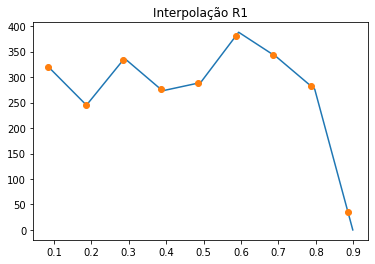

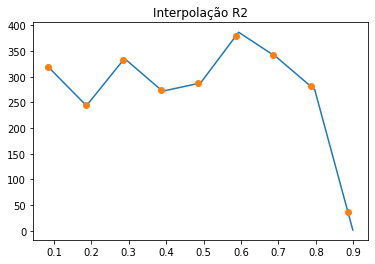

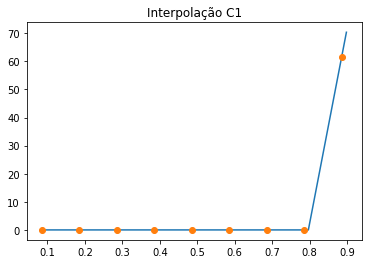

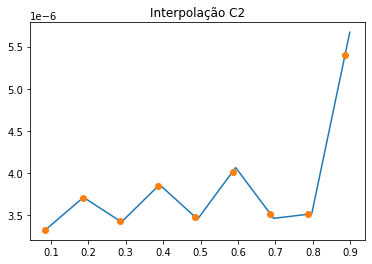

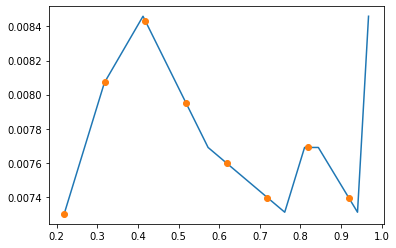

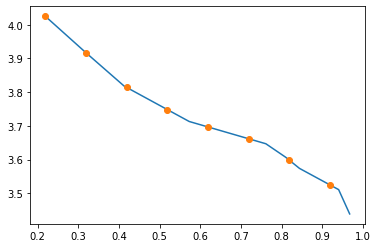

In [19]:
y = R1
fR1 = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[-1], SoC[0], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fR1(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.title("Interpolação R1")
plt.show()

y = R2
fR2 = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[-1], SoC[0], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fR2(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.title("Interpolação R2")
plt.show()

y = C1
fC1 = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[-1], SoC[0], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fC1(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.title("Interpolação C1")
plt.show()

y = C2
fC2 = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[-1], SoC[0], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fC2(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.title("Interpolação C2")
plt.show()



y = [0.0073, 0.00807, 0.00846, 0.00769, 0.00731, 0.00769, 0.00769, 0.00731, 0.00846]
SoC = [0.2185, 0.3175, 0.4125, 0.5726, 0.7612, 0.81, 0.8439, 0.9403, 0.9674]
fR0 = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[0], SoC[-1], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fR0(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.show()


y = [4.025, 3.918, 3.818, 3.713, 3.647, 3.607, 3.574, 3.511, 3.439]
fOCV = interpolate.interp1d(SoC, y)
xnew = np.arange(SoC[0], SoC[-1], 0.1)
ynew = []
for i in range(len(xnew)):
  ynew.append(fOCV(xnew[i]))
plt.plot(SoC, y, '-', xnew, ynew, 'o')
plt.show()

## Modelando nosso circuito vamos conseguir interpolar as curvas e obter nossos resultados

In [20]:
N = len(df)

OCV = df['Tensão'].to_list()
ic = df['Corrente'].to_list()
t = df['Tempo'].to_list()
R0 = []*N
R1 = []*N
R2 = []*N
C1 = []*N
C2 = []*N

v = [] # nossa tensão de saída (objetivo final)

    Agora vamos definidir nossa função para atualizar os parâmetros do circuito

In [21]:
x = df['SoC'].iloc[:1153].to_numpy()
y = df['Tensão'].iloc[:1153].to_numpy()
f = interpolate.interp1d(x, y)
def getParameters(SoC):
  v = f(SoC)
  OCV = fOCV(SoC)
  R0 = fR0(SoC)
  R1 = fR1(SoC)
  R2 = fR2(SoC)
  C1 = fC1(SoC)
  C2 = fC2(SoC)
  return v, OCV, R0, R1, R2, C1, C2

In [22]:
x = np.arange(0.1, 1, 0.025) # 0.1 e 1 indicam o intervalo de valores de SoC
v = []
OCV = []
R0 = []
R1 = []
R2 = []
C1 = []
C2 = []

for i in range(len(x)):
  v.append(f(x[i]).tolist())
  try:
    OCV.append(fOCV(x[i]).tolist())
    R0.append(fR0(x[i]).tolist())
  except:
    if x[i] < 0.5:
      OCV.append(fOCV(0.24).tolist())
      R0.append(fR0(0.24).tolist())
    else: 
      OCV.append(fOCV(0.95).tolist())
      R0.append(fR0(0.95).tolist())
  try:
    R1.append(fR1(x[i]).tolist())
    R2.append(fR2(x[i]).tolist())
    C1.append(fC1(x[i]).tolist())
    C2.append(fC2(x[i]).tolist())
  except:
    if x[i] < 0.5:
      R1.append(fR1(0.1).tolist())
      R2.append(fR2(0.1).tolist())
      C1.append(fC1(0.1).tolist())
      C2.append(fC2(0.1).tolist())
    else:
      R1.append(fR1(0.85).tolist())
      R2.append(fR2(0.85).tolist())
      C1.append(fC1(0.85).tolist())
      C2.append(fC2(0.85).tolist())

In [23]:
df_xy = pd.DataFrame(data=list(zip(x, v, OCV, R0, R1, R2, C1, C2)), columns = ['t', 'V', 'OCV', 'R0', 'R1', 'R2', 'C1', 'C2']) 
fig = px.line(df_xy, x="t", y="V", title='Tensão(t)')
fig.show()

# Testando o valor de corrente para observar tensao de saída

In [24]:
def getVoltage(SoC):
  if SoC > 1:
    SoC = 1
  elif SoC < 0:
    SoC = 0
  return f(SoC).tolist()

In [25]:
df = df.iloc[:1152].copy()
df['Ah'] = df['Corrente'].cumsum()/60 
df['SoC'] = 1 + df['Ah']/64
SoC = df['SoC'].to_list()
v = []
N = len(SoC)
for i in range(N):
  try:
    v.append(getVoltage(SoC[i]))
  except:
    print(i, np.round(SoC[i], 2))
    break
df['v'] = v
df = df.loc[:, ['v', 'Tensão', 't']].copy()

In [26]:
fig = px.line(df, x="t", y="v", title='Tensão via Modelo')
fig.show()

In [27]:
fig2 = px.line(df, x="t", y="Tensão", title='Tensão Medida')
fig2.show()

In [28]:
df.drop(['t'], axis=1, inplace=True)
df.columns = ['Tensão Calculada', 'Tensão Medida']
df.head(10)

,Tensão Calculada,Tensão Medida
0,4.172,4.172
1,4.151,4.151
2,4.148,4.148
3,4.145,4.145
4,4.143,4.143
5,4.141,4.141
6,4.138,4.138
7,4.136,4.136
8,4.133,4.133
9,4.131,4.131


In [30]:
fig = px.line(df, title='Tensao Medida vs Tensao Real')
fig.show()